In [1]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import FuncFormatter

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.


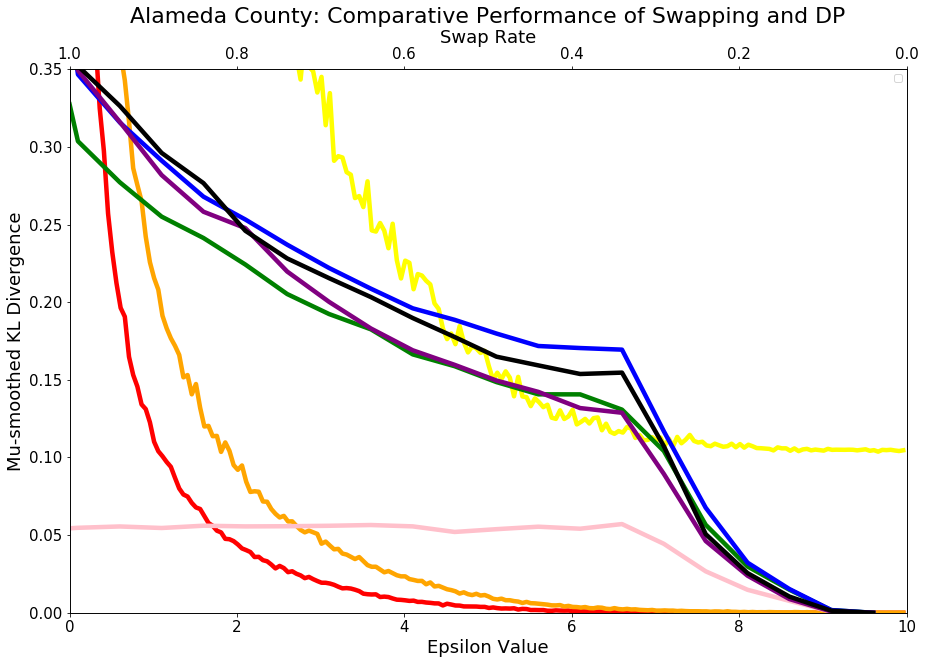

In [41]:
#counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
mu = 0.0001
threshold = 1


for county in counties:

    swap_x0 = []
    swap_y0 = []
    swap_x1 = []
    swap_y1 = []
    swap_x3 = []
    swap_y3 = []
    swap_xr = []
    swap_yr = []
    swap_xtr = []
    swap_ytr = []

    swap0_df = pd.read_csv (r"mean_dif/"+county+"/similar/0LIM_FINAL_DKL.csv")
    swap1_df = pd.read_csv (r"mean_dif/"+county+"/similar/LIM_FINAL_DKL.csv")
    swap3_df = pd.read_csv (r"mean_dif/"+county+"/similar/FULL_FINAL_DKL.csv")
    swapr_df = pd.read_csv (r"mean_dif/"+county+"/random/FAKE_FINAL_DKL.csv")
    swaptr_df = pd.read_csv (r"mean_dif/"+county+"/random/TRUE_FINAL_DKL.csv")

    
    #for i, row in dp_df.iterrows():
    nn=0
    swap_x0.append(0)
    swap_y0.append(0)
    for i, row in swap0_df.iterrows():
        swap_x0.append(float(row['filename']))
        swap_y0.append(row['dkl'])
    
    swap_y0.reverse()
    swap_x0.reverse()
    
    swap_x1.append(0)
    swap_y1.append(0)
    for i, row in swap1_df.iterrows():
        swap_x1.append(float(row['filename']))
        swap_y1.append(row['dkl'])
        
    swap_y1.reverse()
    swap_x1.reverse()
    
    swap_x3.append(0)
    swap_y3.append(0)
    for i, row in swap3_df.iterrows():
        swap_x3.append(float(row['filename']))
        swap_y3.append(row['dkl'])
        
    swap_y3.reverse()
    swap_x3.reverse()
    
    swap_xr.append(0)
    swap_yr.append(0)
    for i, row in swapr_df.iterrows():
        swap_xr.append(float(row['filename']))
        swap_yr.append(row['dkl'])
        
    swap_yr.reverse()
    swap_xr.reverse()
    
    swap_xtr.append(0)
    swap_ytr.append(0)
    for i, row in swaptr_df.iterrows():
        swap_xtr.append(float(row['filename']))
        swap_ytr.append(row['dkl'])
        
    swap_ytr.reverse()
    swap_xtr.reverse()  
    
    
    dp2_x = []
    dp2_y = []
    
    dp15_x = []
    dp15_y = []
    
    dp45_x = []
    dp45_y = []
    

    dp2_df= pd.read_csv ('mean_dif/alameda/dp/binary_age_FINAL_DKLmu0.0001.csv')
    dp15_df = pd.read_csv ('mean_dif/alameda/dp/15_age_race_FINAL_DKLmu0.0001.csv')
    dp45_df= pd.read_csv ('mean_dif/alameda/dp/2_age_race_FINAL_DKLmu0.0001.csv')

    for i, row in dp2_df.iterrows():
        dp2_x.append(float(row['filename']))
        dp2_y.append(row['dkl'])
        
    for i, row in dp15_df.iterrows():
        dp15_x.append(float(row['filename']))
        dp15_y.append(row['dkl'])
        
    for i, row in dp45_df.iterrows():
        dp45_x.append(float(row['filename']))
        dp45_y.append(row['dkl'])
    
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of Swapping and DP', size=22)
    
    ax1 = fig.add_subplot()
       
    ax1.plot(dp2_x, dp2_y, color = 'red', label = 'DP: Binary', linewidth=4.5)
    ax1.plot(dp15_x, dp15_y, color = 'orange', label = 'DP: Six Buckets', linewidth=4.5)
    ax1.plot(dp45_x, dp45_y, color = 'yellow', label = 'DP: Forty-Five Buckets', linewidth=4.5)

    ax1.set_xlim([0,10])
    ax1.set_xlabel("Epsilon Value", size=18)
    ax1.set_ylabel("Mu-smoothed KL Divergence", size=18)
#     ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    plt.xticks(size=15)
    plt.yticks(size=15)
    
           
    ax2 = fig.add_subplot()
    
    swap_y0.reverse()  
    s0 = [x*10 for x in swap_x0]
         
    swap_y1.reverse()       
    s1 = [x*10 for x in swap_x1]
            
    swap_y3.reverse()      
    s3 = [x*10 for x in swap_x3]
    
    swap_yr.reverse()     
    sr = [x*10 for x in swap_xr]
        
    swap_ytr.reverse()        
    str = [x*10 for x in swap_xtr]
        
    ax2.plot(s0, swap_y0, color = 'pink', label='Similar Swapping-Threshold 0', linewidth = 4.5)
    ax2.plot(s1, swap_y1, color = 'green', label='Similar Swapping-Threshold 1', linewidth = 4.5)
    ax2.plot(s3, swap_y3, color = 'blue', label='Similar Swapping-Threshold 3', linewidth = 4.5)
    ax2.plot(sr, swap_yr, color = 'purple', label='Pseudo-Random Swapping', linewidth = 4.5)
    ax2.plot(str, swap_ytr, color = 'black', label='True Random Swapping', linewidth = 4.5)

    ax2 = ax1.twiny()
    ax2.set_xlabel("Swap Rate", size=18)
    ax2.set_xlim([1,0])
    ax2.set_ylim(0,.35)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    plt.legend()

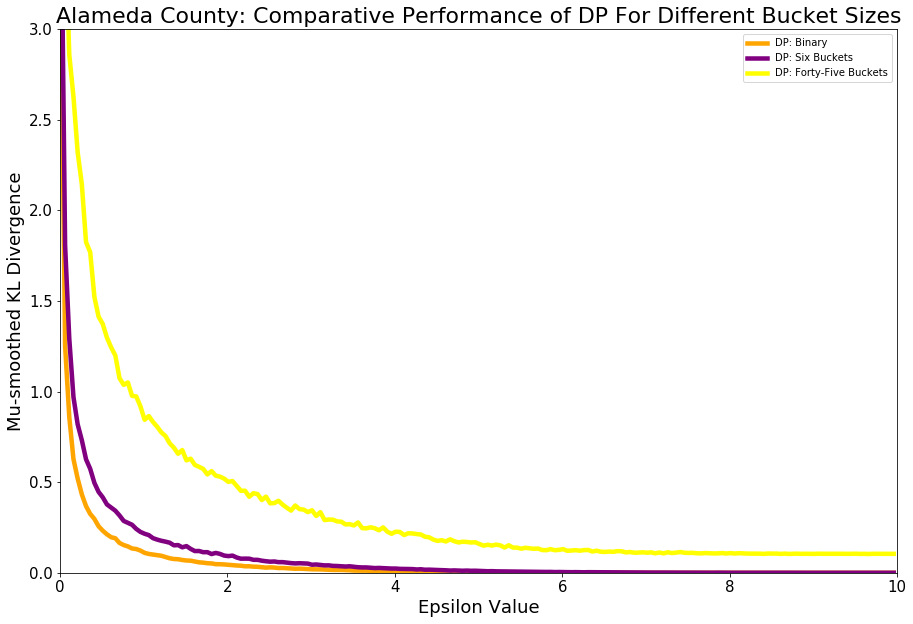

In [51]:
counties = ['Alameda']
mu = 0.0001
threshold = 1


for county in counties:

    dp2_x = []
    dp2_y = []
    
    dp15_x = []
    dp15_y = []
    
    dp45_x = []
    dp45_y = []
    

    dp2_df= pd.read_csv ('mean_dif/alameda/dp/binary_age_FINAL_DKLmu0.0001.csv')
    dp15_df = pd.read_csv ('mean_dif/alameda/dp/15_age_race_FINAL_DKLmu0.0001.csv')
    dp45_df= pd.read_csv ('mean_dif/alameda/dp/2_age_race_FINAL_DKLmu0.0001.csv')

    for i, row in dp2_df.iterrows():
        dp2_x.append(float(row['filename']))
        dp2_y.append(row['dkl'])
        
    for i, row in dp15_df.iterrows():
        dp15_x.append(float(row['filename']))
        dp15_y.append(row['dkl'])
        
    for i, row in dp45_df.iterrows():
        dp45_x.append(float(row['filename']))
        dp45_y.append(row['dkl'])

    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of DP For Different Bucket Sizes', size=22)

    plt.plot(dp2_x, dp2_y, color = 'orange', label = 'DP: Binary', linewidth=4.5)
    plt.plot(dp15_x, dp15_y, color = 'purple', label = 'DP: Six Buckets', linewidth=4.5)
    plt.plot(dp45_x, dp45_y, color = 'yellow', label = 'DP: Forty-Five Buckets', linewidth=4.5)
    
    plt.xlim([0,10])
    plt.ylim([0,3])
    plt.xlabel("Epsilon Value", size=18)
    plt.ylabel("Mu-smoothed KL Divergence", size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)

    plt.legend()
   
    

[0.96, 0.91, 0.86, 0.81, 0.76, 0.71, 0.66, 0.61, 0.56, 0.51, 0.46, 0.41, 0.36, 0.31, 0.26, 0.21, 0.16, 0.11, 0.06, 0.01, 0]
[0.05439443780021525, 0.05473041908874223, 0.055585491342824464, 0.05460179646834935, 0.05607202624413511, 0.055629596387782296, 0.05573034232689568, 0.056031657395824094, 0.05651460936063631, 0.055645045782817856, 0.05204982072679256, 0.05384123348898432, 0.055434223743195565, 0.05414323261543343, 0.05713217874046681, 0.04441463761842292, 0.026707880277259417, 0.014816346805414052, 0.0076945795184537955, 0.00072330415245341, 0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


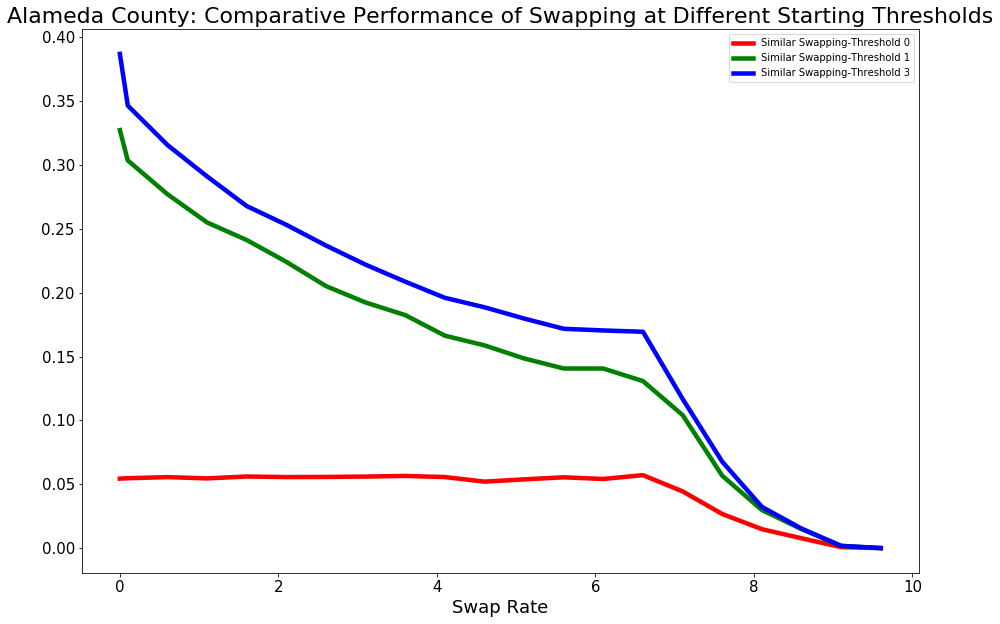

In [4]:
counties = ['Alameda']
mu = 0.0001
threshold = 1

for county in counties:

    swap_x0 = []
    swap_y0 = []
    swap_x1 = []
    swap_y1 = []
    swap_x3 = []
    swap_y3 = []

    swap0_df = pd.read_csv (r"mean_dif/"+county+"/similar/0LIM_FINAL_DKL.csv")
    swap1_df = pd.read_csv (r"mean_dif/"+county+"/similar/LIM_FINAL_DKL.csv")
    swap3_df = pd.read_csv (r"mean_dif/"+county+"/similar/FULL_FINAL_DKL.csv")

    nn=0
    swap_x0.append(0)
    swap_y0.append(0)
    for i, row in swap0_df.iterrows():
        swap_x0.append(float(row['filename']))
        swap_y0.append(row['dkl'])
    
    swap_y0.reverse()
    swap_x0.reverse()
        
    print(swap_x0)
    print(swap_y0)
    
    swap_x1.append(0)
    swap_y1.append(0)
    for i, row in swap1_df.iterrows():
        swap_x1.append(float(row['filename']))
        swap_y1.append(row['dkl'])
        
    swap_y1.reverse()
    swap_x1.reverse()
    
    swap_x3.append(0)
    swap_y3.append(0)
    for i, row in swap3_df.iterrows():
        swap_x3.append(float(row['filename']))
        swap_y3.append(row['dkl'])
        
    swap_y3.reverse()
    swap_x3.reverse()
    
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of Swapping at Different Starting Thresholds', size=22)
           
    ax2 = fig.add_subplot()    
    for s in range(0, len(swap_x0)):
        swap_y0[s] = str(swap_y0[s])        
    swap_y0.reverse()    
    for s in range(0, len(swap_x0)):
        swap_y0[s] = float(swap_y0[s])    
    s0 = [x*10 for x in swap_x0]
    
    
    for s in range(0, len(swap_x1)):
        swap_y1[s] = str(swap_y1[s])        
    swap_y1.reverse()    
    for s in range(0, len(swap_x1)):
        swap_y1[s] = float(swap_y1[s])    
    s1 = [x*10 for x in swap_x1]
    
    for s in range(0, len(swap_x3)):
        swap_y3[s] = str(swap_y3[s])        
    swap_y3.reverse()    
    for s in range(0, len(swap_x3)):
        swap_y3[s] = float(swap_y3[s])    
    s3 = [x*10 for x in swap_x3]
   
    
    plt.plot(s0, swap_y0, color = 'red', label='Similar Swapping-Threshold 0', linewidth = 4.5)
    plt.plot(s1, swap_y1, color = 'green', label='Similar Swapping-Threshold 1', linewidth = 4.5)
    plt.plot(s3, swap_y3, color = 'blue', label='Similar Swapping-Threshold 3', linewidth = 4.5)
#     #ax2.invert()
    
    plt.xlabel("Swap Rate", size=18)
#     plt.xlim([1,0])
#     plt.ylim(0,.35)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    
    
#     if not os.path.exists("DKL_threshold"+str(threshold)+"_mu"+str(mu)):
#         os.makedirs("DKL_threshold"+str(threshold)+"_mu"+str(mu))
#     plt.savefig("DKL_threshold"+str(threshold)+"_mu"+str(mu)+"/"+county+".png")

    handles, labels = ax2.get_legend_handles_labels()
    plt.legend(handles, labels)
   
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


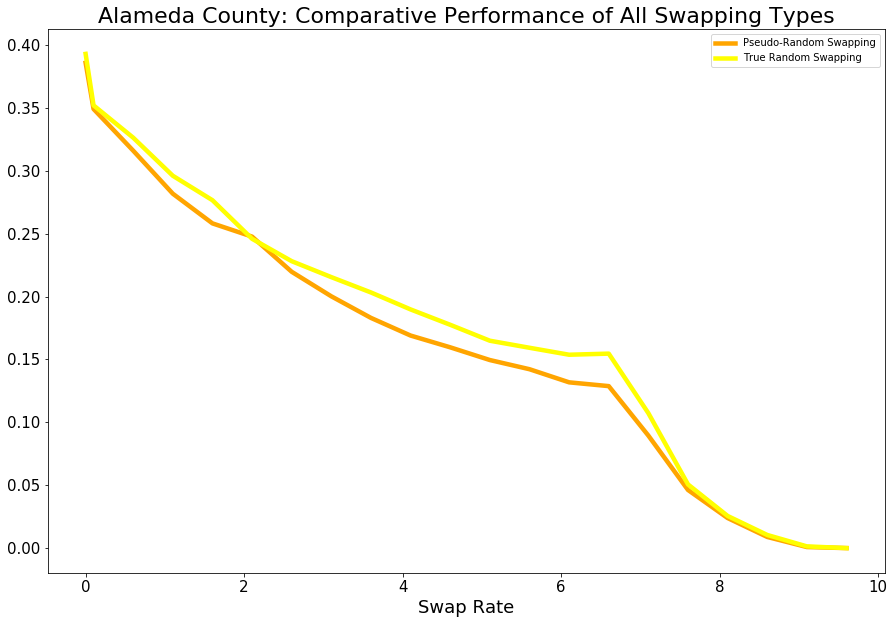

In [30]:
counties = ['Alameda']
mu = 0.0001
threshold = 1

for county in counties:

    swap_x0 = []
    swap_y0 = []
    swap_x1 = []
    swap_y1 = []
    swap_x3 = []
    swap_y3 = []
    swap_xr = []
    swap_yr = []
    swap_xtr = []
    swap_ytr = []

    swap0_df = pd.read_csv (r"mean_dif/"+county+"/similar/0LIM_FINAL_DKL.csv")
    swap1_df = pd.read_csv (r"mean_dif/"+county+"/similar/LIM_FINAL_DKL.csv")
    swap3_df = pd.read_csv (r"mean_dif/"+county+"/similar/FULL_FINAL_DKL.csv")
    swapr_df = pd.read_csv (r"mean_dif/"+county+"/random/FAKE_FINAL_DKL.csv")
    swaptr_df = pd.read_csv (r"mean_dif/"+county+"/random/TRUE_FINAL_DKL.csv")

    nn=0
    swap_x0.append(0)
    swap_y0.append(0)
    for i, row in swap0_df.iterrows():
        swap_x0.append(float(row['filename']))
        swap_y0.append(row['dkl'])
    
    swap_y0.reverse()
    swap_x0.reverse()
    
    swap_x1.append(0)
    swap_y1.append(0)
    for i, row in swap1_df.iterrows():
        swap_x1.append(float(row['filename']))
        swap_y1.append(row['dkl'])
        
    swap_y1.reverse()
    swap_x1.reverse()
    
    swap_x3.append(0)
    swap_y3.append(0)
    for i, row in swap3_df.iterrows():
        swap_x3.append(float(row['filename']))
        swap_y3.append(row['dkl'])
        
    swap_y3.reverse()
    swap_x3.reverse()
    
    swap_xr.append(0)
    swap_yr.append(0)
    for i, row in swapr_df.iterrows():
        swap_xr.append(float(row['filename']))
        swap_yr.append(row['dkl'])
        
    swap_yr.reverse()
    swap_xr.reverse()
    
    swap_xtr.append(0)
    swap_ytr.append(0)
    for i, row in swaptr_df.iterrows():
        swap_xtr.append(float(row['filename']))
        swap_ytr.append(row['dkl'])
        
    swap_ytr.reverse()
    swap_xtr.reverse()  
    
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of All Swapping Types', size=22)
           
    ax2 = fig.add_subplot()  
    
#     for s in range(0, len(swap_y0)):
#         swap_y0[s] = str(float(swap_y0[s]))
    
    swap_y0.reverse()
#     for s in range(0, len(swap_x0)):
#         swap_y0[s] = float(swap_y0[s])    
    s0 = [x*10 for x in swap_x0]
    
    
#     for s in range(0, len(swap_y1)):
#         swap_y1[s] = str(swap_y1[s])        
    swap_y1.reverse()    
#     for s in range(0, len(swap_x1)):
#         swap_y1[s] = float(swap_y1[s])    
    s1 = [x*10 for x in swap_x1]
    
#     for s in range(0, len(swap_x3)):
#         swap_y3[s] = str(swap_y3[s])        
    swap_y3.reverse()    
#     for s in range(0, len(swap_x3)):
#         swap_y3[s] = float(swap_y3[s])    
    s3 = [x*10 for x in swap_x3]
    
#     for s in range(0, len(swap_xr)):
#         swap_yr[s] = str(swap_yr[s])        
    swap_yr.reverse()    
#     for s in range(0, len(swap_xr)):
#         swap_yr[s] = float(swap_yr[s])    
    sr = [x*10 for x in swap_xr]
    
#     for s in range(0, len(swap_xtr)):
#         swap_ytr[s] = str(swap_ytr[s])        
    swap_ytr.reverse()    
#     for s in range(0, len(swap_xtr)):
#         swap_ytr[s] = float(swap_ytr[s])    
    str = [x*10 for x in swap_xtr]
   
    
#     plt.plot(s0, swap_y0, color = 'red', label='Similar Swapping-Threshold 0', linewidth = 4.5)
#     plt.plot(s1, swap_y1, color = 'green', label='Similar Swapping-Threshold 1', linewidth = 4.5)
#     plt.plot(s3, swap_y3, color = 'blue', label='Similar Swapping-Threshold 3', linewidth = 4.5)
    plt.plot(sr, swap_yr, color = 'orange', label='Pseudo-Random Swapping', linewidth = 4.5)
    plt.plot(str, swap_ytr, color = 'yellow', label='True Random Swapping', linewidth = 4.5)
#     #ax2.invert()
    
    plt.xlabel("Swap Rate", size=18)
#     plt.xlim([1,0])
#     plt.ylim(0,.35)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    
    
#     if not os.path.exists("DKL_threshold"+str(threshold)+"_mu"+str(mu)):
#         os.makedirs("DKL_threshold"+str(threshold)+"_mu"+str(mu))
#     plt.savefig("DKL_threshold"+str(threshold)+"_mu"+str(mu)+"/"+county+".png")

    handles, labels = ax2.get_legend_handles_labels()
    plt.legend(handles, labels)
   
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


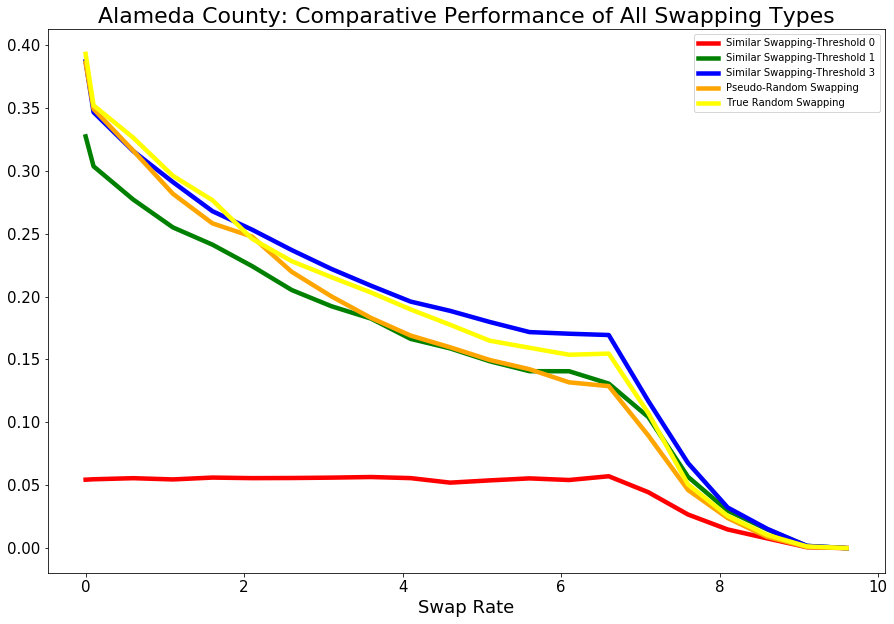

In [31]:
counties = ['Alameda']
mu = 0.0001
threshold = 1

for county in counties:

    swap_x0 = []
    swap_y0 = []
    swap_x1 = []
    swap_y1 = []
    swap_x3 = []
    swap_y3 = []
    swap_xr = []
    swap_yr = []
    swap_xtr = []
    swap_ytr = []

    swap0_df = pd.read_csv (r"mean_dif/"+county+"/similar/0LIM_FINAL_DKL.csv")
    swap1_df = pd.read_csv (r"mean_dif/"+county+"/similar/LIM_FINAL_DKL.csv")
    swap3_df = pd.read_csv (r"mean_dif/"+county+"/similar/FULL_FINAL_DKL.csv")
    swapr_df = pd.read_csv (r"mean_dif/"+county+"/random/FAKE_FINAL_DKL.csv")
    swaptr_df = pd.read_csv (r"mean_dif/"+county+"/random/TRUE_FINAL_DKL.csv")

    nn=0
    swap_x0.append(0)
    swap_y0.append(0)
    for i, row in swap0_df.iterrows():
        swap_x0.append(float(row['filename']))
        swap_y0.append(row['dkl'])
    
    swap_y0.reverse()
    swap_x0.reverse()
    
    swap_x1.append(0)
    swap_y1.append(0)
    for i, row in swap1_df.iterrows():
        swap_x1.append(float(row['filename']))
        swap_y1.append(row['dkl'])
        
    swap_y1.reverse()
    swap_x1.reverse()
    
    swap_x3.append(0)
    swap_y3.append(0)
    for i, row in swap3_df.iterrows():
        swap_x3.append(float(row['filename']))
        swap_y3.append(row['dkl'])
        
    swap_y3.reverse()
    swap_x3.reverse()
    
    swap_xr.append(0)
    swap_yr.append(0)
    for i, row in swapr_df.iterrows():
        swap_xr.append(float(row['filename']))
        swap_yr.append(row['dkl'])
        
    swap_yr.reverse()
    swap_xr.reverse()
    
    swap_xtr.append(0)
    swap_ytr.append(0)
    for i, row in swaptr_df.iterrows():
        swap_xtr.append(float(row['filename']))
        swap_ytr.append(row['dkl'])
        
    swap_ytr.reverse()
    swap_xtr.reverse()  
    
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of All Swapping Types', size=22)
           
    ax2 = fig.add_subplot()  

    swap_y0.reverse()
  
    s0 = [x*10 for x in swap_x0]
         
    swap_y1.reverse()    
   
    s1 = [x*10 for x in swap_x1]
            
    swap_y3.reverse()    
  
    s3 = [x*10 for x in swap_x3]
    
    swap_yr.reverse()    
 
    sr = [x*10 for x in swap_xr]
        
    swap_ytr.reverse()    
    
    str = [x*10 for x in swap_xtr]
    
    
    dp2_x = []
    dp2_y = []
    
    dp15_x = []
    dp15_y = []
    
    dp45_x = []
    dp45_y = []
    

    dp2_df= pd.read_csv ('mean_dif/alameda/dp/binary_age_FINAL_DKLmu0.0001.csv')
    dp15_df = pd.read_csv ('mean_dif/alameda/dp/15_age_race_FINAL_DKLmu0.0001.csv')
    dp45_df= pd.read_csv ('mean_dif/alameda/dp/2_age_race_FINAL_DKLmu0.0001.csv')

    for i, row in dp2_df.iterrows():
        dp2_x.append(float(row['filename']))
        dp2_y.append(row['dkl'])
        
    for i, row in dp15_df.iterrows():
        dp15_x.append(float(row['filename']))
        dp15_y.append(row['dkl'])
        
    for i, row in dp45_df.iterrows():
        dp45_x.append(float(row['filename']))
        dp45_y.append(row['dkl'])
   
    
    plt.plot(s0, swap_y0, color = 'red', label='Similar Swapping-Threshold 0', linewidth = 4.5)
    plt.plot(s1, swap_y1, color = 'green', label='Similar Swapping-Threshold 1', linewidth = 4.5)
    plt.plot(s3, swap_y3, color = 'blue', label='Similar Swapping-Threshold 3', linewidth = 4.5)
    plt.plot(sr, swap_yr, color = 'orange', label='Pseudo-Random Swapping', linewidth = 4.5)
    plt.plot(str, swap_ytr, color = 'yellow', label='True Random Swapping', linewidth = 4.5)
#     #ax2.invert()
    
    plt.xlabel("Swap Rate", size=18)
#     plt.xlim([1,0])
#     plt.ylim(0,.35)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    
    
#     if not os.path.exists("DKL_threshold"+str(threshold)+"_mu"+str(mu)):
#         os.makedirs("DKL_threshold"+str(threshold)+"_mu"+str(mu))
#     plt.savefig("DKL_threshold"+str(threshold)+"_mu"+str(mu)+"/"+county+".png")

    handles, labels = ax2.get_legend_handles_labels()
    plt.legend(handles, labels)
   
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


21
200
21
200


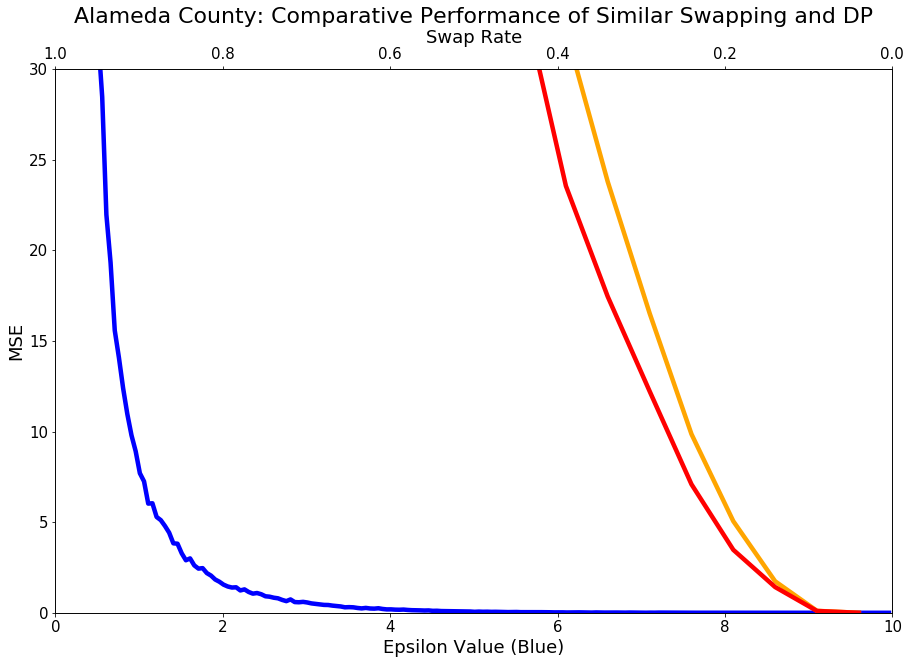

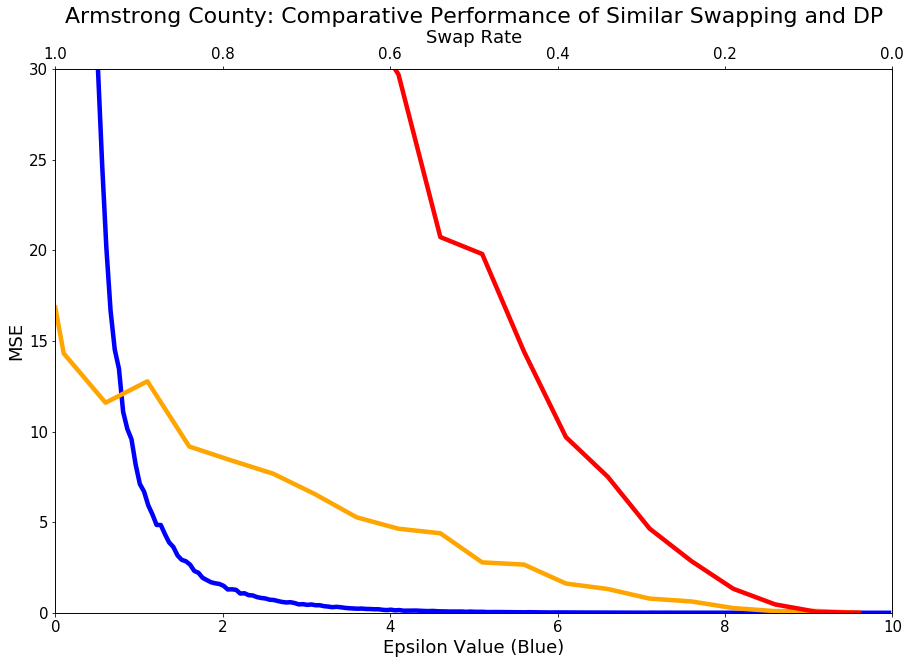

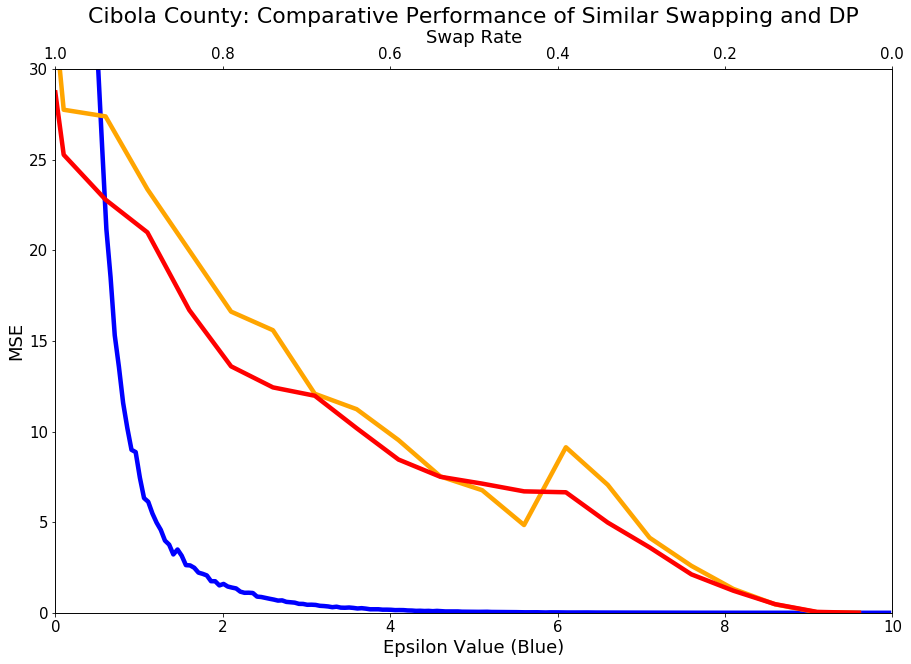

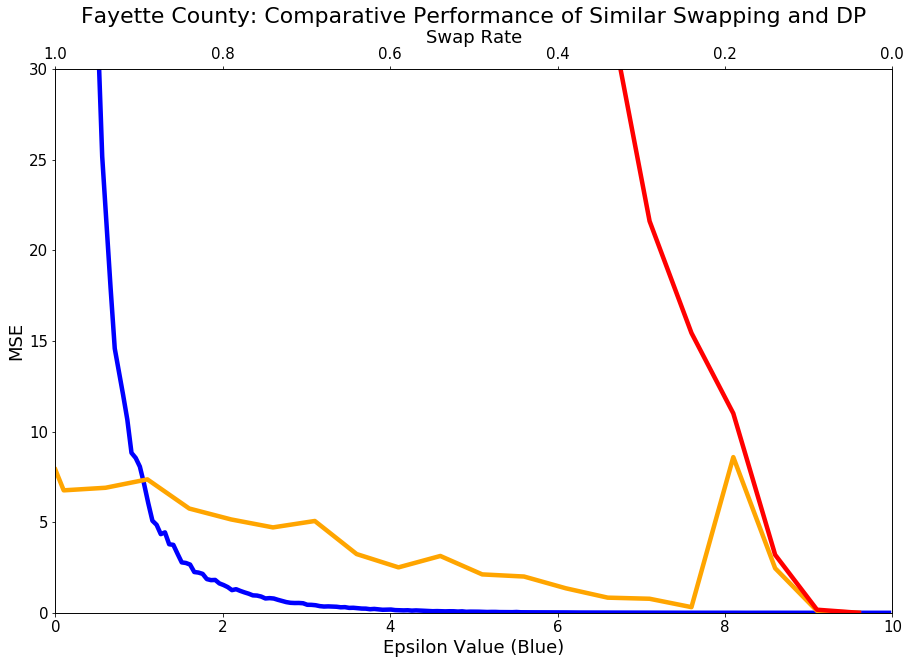

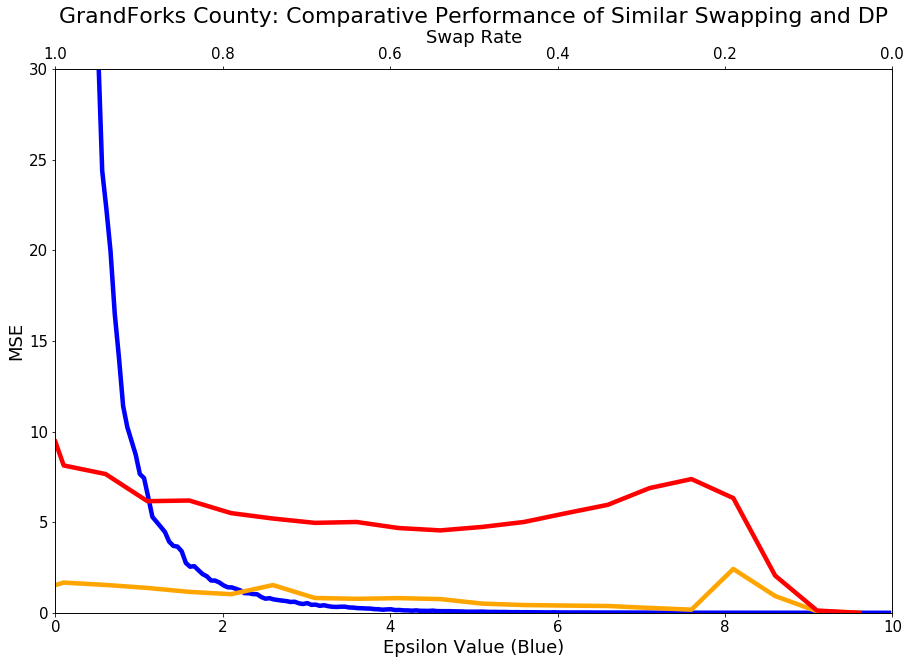

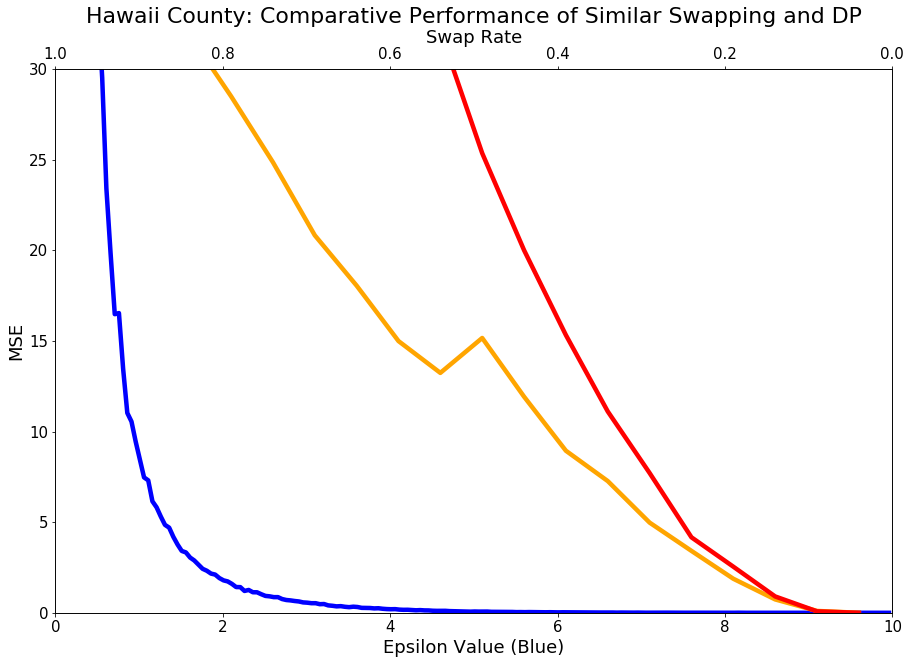

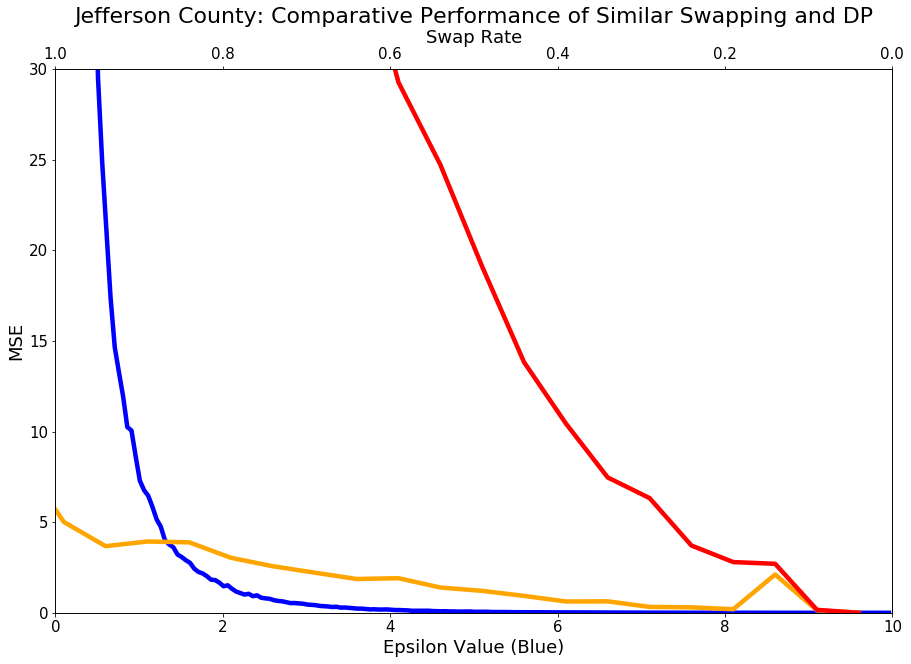

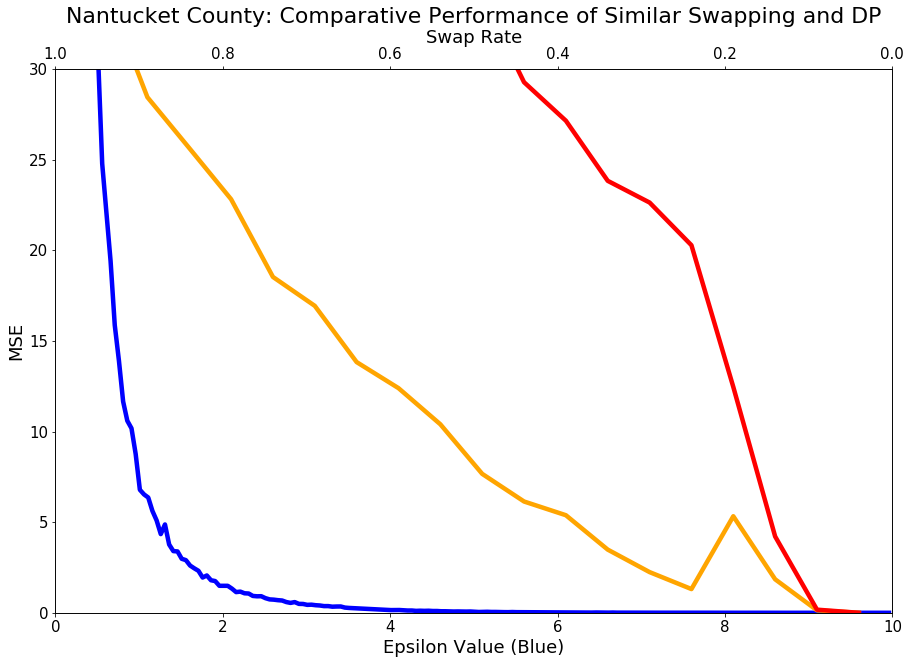

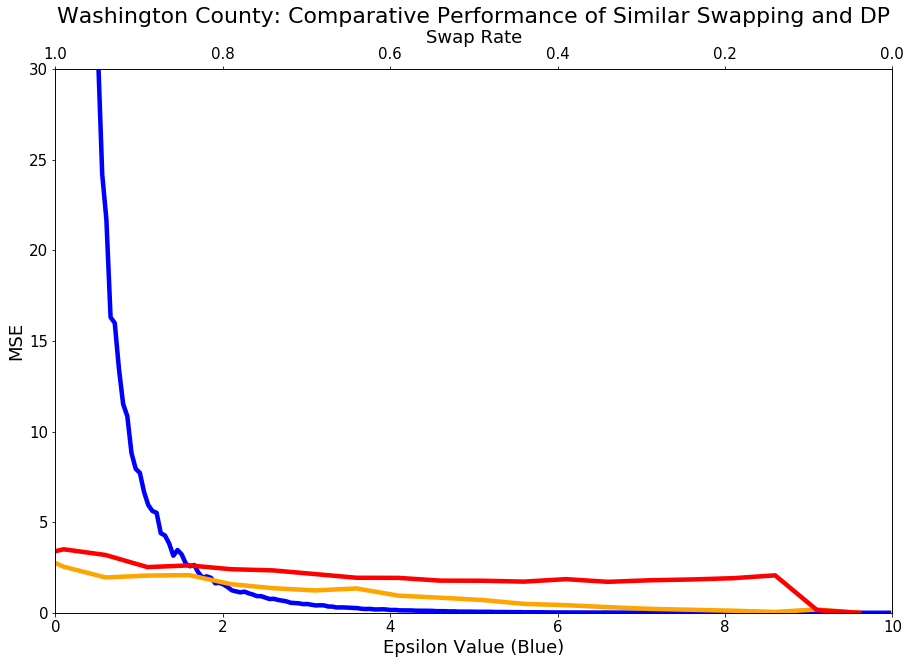

In [6]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
threshold = .1


for county in counties:

    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []
    
    swap_x2 = []
    swap_y2 = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/similar/FINAL_MSEthreshold'+str(threshold)+'.csv')
    swap2_df = pd.read_csv (r'mean_dif/'+county+'/random/FINAL_MSEthreshold'+str(threshold)+'.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/FINAL_MSEthreshold'+str(threshold)+'.csv')
    #for i, row in dp_df.iterrows():
    nn=0
    swap_x.append(0)
    swap_y.append(0)
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mse'])
    
    swap_x2.append(0)
    swap_y2.append(0)
    for i, row in swap2_df.iterrows():
        swap_x2.append(float(row['filename']))
        swap_y2.append(row['mse'])
    
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mse'])
    
#     print(dp_x)
#     print(dp_y)
#     print(swap_x)
#     print(swap_y)
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of Similar Swapping and DP', size=22)
    
    ax1 = fig.add_subplot()
    
    ax1.plot(dp_x, dp_y, color = 'blue', linewidth=4.5)
    ax1.set_xlim([0,10])
    ax1.set_xlabel("Epsilon Value (Blue)", size=18)
    ax1.set_ylabel("MSE", size=18)
#     ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    plt.xticks(size=15)
    plt.yticks(size=15)
    
           
    ax2 = fig.add_subplot()
    
    for s in range(0, len(swap_x)):
        swap_y[s] = str(swap_y[s])
        
    swap_y.reverse()
    
    for s in range(0, len(swap_x)):
        swap_y[s] = float(swap_y[s])
    
    s1 = [x*10 for x in swap_x]
    
    
    for s in range(0, len(swap_x2)):
        swap_y2[s] = str(swap_y2[s])
        
    swap_y2.reverse()
    
    for s in range(0, len(swap_x2)):
        swap_y2[s] = float(swap_y2[s])
    
    s2 = [x*10 for x in swap_x2]
   
    
    ax2.plot(s1, swap_y, color = 'orange', linewidth = 4.5)
    ax2.plot(s2, swap_y2, color = 'red', linewidth = 4.5)
    #ax2.invert()
    
    ax2 = ax1.twiny()
    ax2.set_xlabel("Swap Rate", size=18)
    ax2.set_xlim([1,0])
    ax2.set_ylim(0,30)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    if not os.path.exists("MSE_"+str(threshold)):
        os.makedirs("MSE_"+str(threshold))
    plt.savefig("MSE_"+str(threshold)+"/"+county+".png")
    #plt.savefig('../figures/compare_3_meandif/lessthick/'+county+'.png')
    
    print(len(s1))
    print(len(dp_x))
    print(len(swap_y))
    print(len(dp_y)) 
    
    
    #handles, labels = axes.get_legend_handles_labels()
    
    